In [11]:
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
import numpy as np

### Fitting Tiago Drawings

Tiago has proposed a model on which the depth and width of the channel is not constant along all the curve. 
The main assumption here is that this two properties are dependently strictly of the terrain slope.

We can see in the plot that width x slope tends towards a exponencial dependency and depth x slope tends to a linear dependency.

[ 0  1  5 10  1  0  0  0]


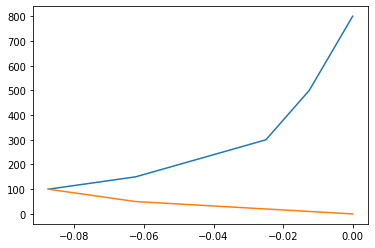

In [8]:
slope = np.tan(np.linspace(-5.0, 0.0, 8) * np.pi / 180)
width = np.array([100.0, 125.0, 150.0, 200.0, 250.0, 300.0, 500.0, 800.0])
depth = np.array([100.0, 75.0, 50.0, 40.0, 30.0, 20.0, 10.0, 0])
levee = np.array([[0, 0], [1, 250], [5, 1000], [10, 5000], [1, 10000], [0, 0], [0, 0], [0, 0]])
print(levee[:,0])

plt.plot(slope, width, slope, depth)

### width constants
692.4154350661511 -45.231656699536124 104.60941780103624
### depth constants
25.547936126503313 17.814204984428248 -22.543087143554683


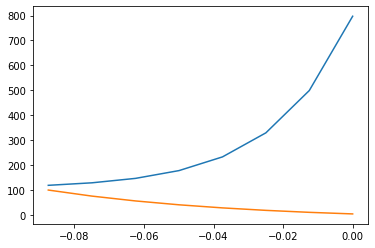

In [9]:
W2, W1, W0 = curve_fit(lambda x, a, b, c: a * np.exp(-b * x) + c, slope, width)[0]
D2, D1, D0 = curve_fit(lambda x, a, b, c: a * np.exp(-b * x) + c, slope, depth)[0]

fitted_width = W2 * np.exp(- W1 * slope) + W0
fitted_depth = D2 * np.exp(- D1 * slope) + D0

print('### width constants')
print(W2, W1, W0)

print('### depth constants')
print(D2, D1, D0)
plt.plot(slope, fitted_width, slope, fitted_depth)


## Fitting Maps (depth)

Since the maps are top view images of the channel it's  possible to represent channel width information but not depth information. However, channel width and depth are slope dependent. Thus, the aproach to represent depth is relationing it to width.

[ 0  1  5 10  1  0  0  0]
### depth constants
0.0014037355196363848 -0.8514792665395621 120.08049908837464


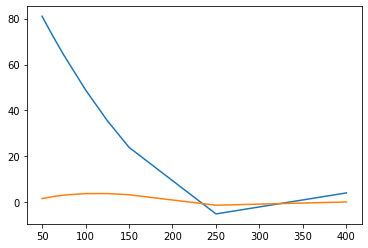

In [10]:
hw = width / 2

D2, D1, D0 = curve_fit(lambda x, a, b, c: a *x** 2 + b*x + c, hw, depth)[0]

print(levee[:,0])

LH1, LH2, LH3, LH4 = curve_fit(lambda x, a, b, c, d: a *x** 3 + b * x ** 2 + c*x + d, hw, levee[:,0])[0]

fitted_depth = D2 * hw ** 2 + D1 * hw + D0
fitted_lh = LH1 * hw ** 3 + LH2 * hw ** 2 + LH3 * hw + LH4

print('### depth constants')
print(D2, D1, D0)
plt.plot(hw, fitted_depth, hw, fitted_lh)


## Deposional Fitting

Again, same approch as before, the usage the width as a way to parametrize variables that depends on the slope.

### depth constants
1.6273636610885987e-06 -0.0015696818378884967 0.3939090951922842 -3.0090911297132212
[  0.          55.55555556 111.11111111 166.66666667 222.22222222
 277.77777778 333.33333333 388.88888889 444.44444444 500.        ]
17.831090867399475 12.346284015419078 7.556727194711305


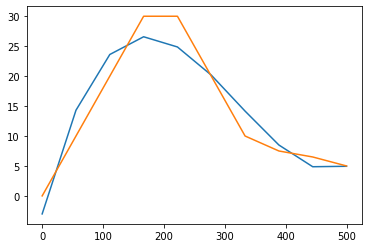

In [24]:
# sediment height
sh = [0, 10, 20, 30, 30, 20, 10, 7.5, 6.5, 5]
hw = np.linspace(0, 500, 10)

LH1, LH2, LH3, LH4 = curve_fit(lambda x, a, b, c, d: a *x** 3 + b * x ** 2 + c*x + d, hw, sh)[0]


fitted_lh = lambda hw: LH1 * hw ** 3 + LH2 * hw ** 2 + LH3 * hw + LH4

print('### depth constants')
print(LH1, LH2, LH3, LH4)
print(hw)
print(fitted_lh(300), fitted_lh(350), fitted_lh(400))

plt.plot(hw, fitted_lh(hw), hw, sh)
